<center>
<br></br><br></br>
<h1>Computer Homework 1</h1>
<br></br><br></br>
<h1>จัดทำโดย</h1>
<h1>นายสุริยา เตชะลือ รหัสนักศึกษา 600610790</h1>
<br></br><br></br>
<h1>เสนอ</h1>
<h1>ผศ.ดร. ศันสนีย์ เอื้อพันธ์วิริยะกุล</h1>
<br></br><br></br>
<h1>รายงานนี้เป็นส่วนหนึ่งของรายวิชา 261456</h1>
<h1>(Introduction to Computational Intelligence)</h1>
</center>


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def read_txt(file):
    f=open(file, "r")
    if(file[-3:] == 'txt'):
        contents =f.readlines()

        dataset = np.zeros((len(contents)-2,len(contents[2].split('\t'))-1))
        label = np.zeros((len(contents)-2))

        for i in range(len(contents)-2):
            x = contents[i+2].split("\t")
            for j in range(len(x)):
                if j != len(x) - 1 :
                    dataset[i][j] = float(x[j])
                else :
                    label[i] = float(x[j][:-1])
    else :
        contents =f.readlines()
        n_data = int(len(contents)/3)
        dataset = np.zeros((n_data,2))
        label = np.zeros((n_data,2))
        j = 0
        count = 0
        for i in range(len(contents)):
            if(j == 1):
                dataset[count][0] = float(contents[i].split()[0])
                dataset[count][1] = float(contents[i].split()[1])
            if(j == 2):
                label[count][0] = int(contents[i].split()[0])
                label[count][1] = int(contents[i].split()[1])
                count = count + 1
                j = -1
            j += 1
            
    return dataset,label

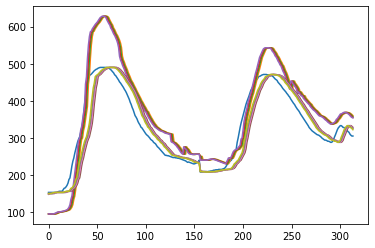

In [4]:
dataset, label = read_txt("./Flood_dataset.txt")
plt.plot(label, label="Y")
plt.plot(dataset)
plt.show()

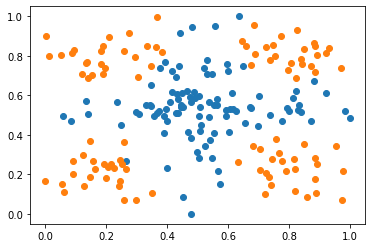

In [7]:
dataset, label = read_txt("./cross.pat")

setAx = []
setAy = []
setBx = []
setBy = []

for i in range(len(label)):
    if label[i][0] == 0:
        setAx.append(dataset[i][0])
        setAy.append(dataset[i][1])
    if label[i][0] == 1:
        setBx.append(dataset[i][0])
        setBy.append(dataset[i][1])

plt.scatter(setAx, setAy, label='SetA')
plt.scatter(setBx, setBy, label='SetB')

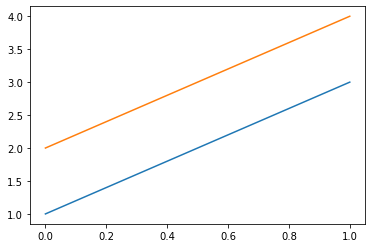

In [6]:
import matplotlib.pyplot as plt
plt.plot([[1,2],[3,4]])
plt.show()

In [5]:
def norm(data_in):
    data = data_in.copy()
    datanorm = (data - data.min())/(data.max() - data.min())

    return datanorm

In [6]:
def convert_norm(pred,mx,mn):
    return pred*(mx - mn) + mn

In [7]:
import numpy as np
class NN :
    
    def __init__(self,shape,nueral_shape,acti_funct):
        shape[1:1] = nueral_shape 
        self.shape = shape
        self.act_func = acti_funct
        self.weights = self.init_weights(self.shape)
        self.outputs = None
        self.deltas = None
        self.del_old_weights = None
        
    def init_old_weights(self,network_shape):
        weight_arrays = []
        for i in range(0, len(network_shape) - 1):
            cur_idx = i
            next_idx = i + 1
            weight_array = np.zeros((network_shape[next_idx], network_shape[cur_idx]))
            weight_arrays.append(weight_array)
        
        return weight_arrays
    
    def init_weights(self,network_shape):
        weight_arrays = []
        for i in range(0, len(network_shape) - 1):
            cur_idx = i
            next_idx = i + 1
            weight_array = 2*np.random.rand(network_shape[next_idx], network_shape[cur_idx]) - 1
            weight_arrays.append(weight_array)

        return weight_arrays


    def predict(self,sample):
        
        current_input =  (sample.copy()).T
        outputs = []
        for network_weight in self.weights:
            current_output_temp = np.dot(network_weight, current_input)
            current_output = self.acti_funct(current_output_temp)
            outputs.append(current_output)
            current_input = current_output
        
        if(self.shape[-1] == 1) :
            return current_output.T
        else :
            tp = None 
            fp = None 
            for i in range(len(outputs[-1])):
                if( i == 0) :
                    tp = outputs[-1][i]
                else :
                    fp = outputs[-1][i]
                    tp = np.vstack((tp, fp)).T
            return np.argmax(tp, axis=1)
                    
    def train(self,sample, d_out, training_rate,momentum_rate,epoch,show=True):
        sample_T = (sample.copy()).T
        d_out_T = (d_out.copy()).T
        for i in range(epoch):
            self.FW_NN(sample_T)
            self.BW_NN(d_out_T)
            self.update_weights(sample_T,learning_rate,momentum_rate,i)
            sqe = self.sum_sqaure_error(self.predict(sample),d_out_T)
            if(show and i % 10 == 0):
                print('Epoch : #'+str(i)+',  Sum Square Error : '+str(sqe))
            if sqe < np.finfo(np.float32).eps :
                break
                
    def FW_NN(self,input):

        current_input = input
        outputs = []
        for w in self.weights:
            current_output_tmp = np.dot(w, current_input)
            current_output = self.acti_funct(current_output_tmp)
            outputs.append(current_output)
            current_input = current_output
        self.outputs = outputs
        
    def BW_NN(self,d_out):
        
        deltas = []
        O_error = d_out - self.outputs[len(self.outputs)-1]
        O_delta = O_error *self.derivertive_acti_funct(self.outputs[len(self.outputs)-1])
        deltas.append(O_delta)

        cur_delta = O_delta
        back_idx = len(self.outputs) - 2

        for w in self.weights[::-1][:-1]:
            hidd_error = np.dot(w.T, cur_delta)
            hidd_delta = hidd_error * self.derivertive_acti_funct(self.outputs[back_idx])
            deltas.append(hidd_delta)
            cur_delta = hidd_delta
            back_idx -= 1
            
        self.deltas = deltas
    
    def update_weights(self,sample,learning_rate,momentum_rate,count):
        index_current_weight = len(self.weights) - 1
        current_dels = []
        for d in self.deltas:
            sample_used = None
            if index_current_weight - 1 < 0:
                sample_used = sample
            else:
                sample_used = self.outputs[index_current_weight - 1]
                
            current_delta = learning_rate*np.dot(d, sample_used.T)
            
            if(count == 0) :
                self.weights[index_current_weight] +=  current_delta
            else :
                self.weights[index_current_weight] +=  momentum_rate*self.del_old_weights[index_current_weight]+ current_delta
            index_current_weight -= 1
            current_dels.insert(0, current_delta)
            
        self.del_old_weights = current_dels

    def acti_funct(self,v):
        if self.act_func == 'sigmoid' :
            return 1 / (1 + np.exp(-v))
        if self.act_func == 'tanh' :
            return np.tanh(v)
        if self.act_func == 'linear' :
            return v
        return v

    def derivertive_acti_funct(self,v):
        if self.act_func == 'sigmoid' :
            return v * (1 - v)
        if self.act_func == 'tanh' :
            return 1 - (v ** 2)
        if self.act_func == 'linear' :
            return 1
        return v

        
    def sum_sqaure_error(self,pred,real):
        real_m = real.copy()
        sums = 0
        if(real.ndim > 1) :
            tp = None 
            fp = None 
            for i in range(len(real_m)):
                if( i == 0) :
                    tp = real_m[i]
                else :
                    fp = real_m[i]
                    tp = np.vstack((tp, fp)).T
            real_m = np.argmax(tp, axis=1)
        for i in range(len(pred)):
            sums = sums + np.square(pred[i]-real_m[i])
        return sums/2
    
    def conf_matrix(self,pred,true,is_norm=False,confuse=True,Table=True):
        true_m = np.zeros(len(true))
        if(true.ndim > 1) :
            for i in range(len(true)):
                true_m[i] = np.argmax(true[i], axis=0)
        if(is_norm):
            sqr_error = 0 
            if(Table):
                print('Desired Output\t\t|\tPredict\t\t\t|\tError')
                print('-----------------------------------------------------------------------------')
            for i in range(len(true)):
                error = round(true[i] - round(pred[i][0],8),2)
                if(Table):
                    print(str(int(true[i]))+'\t\t\t\t|\t'+str(format(round(pred[i][0],8), '.8f'))+'\t\t|\t'+str(error))
                sqr_error = sqr_error + (error * error)
            if(Table):
                print('-----------------------------------------------------------------------------')
                print('\t\t Mean Square Error = '+str(round(sqr_error/len(true),6)))
                print('=======================================')
            return round(sqr_error/len(true),6)
        else :
            if(Table):
                print('Desired Output\t\t|\tPredict\t\t\t')
                print('------------------------------------------------')
                for i in range(len(true)):
                    print(str(int(true_m[i]))+'\t\t\t\t|\t'+str(pred[i]))
                print('------------------------------------------------')
        if(confuse):
            print('\n\t\t Confusion Matrix')
            TP = 0
            FN = 0
            FP = 0
            TN = 0
            for i in range(len(true)):
                if((pred[i] == 0) and ( true_m[i] == 0)):
                    TN = TN + 1 
                elif((pred[i] == 1) and ( true_m[i] == 1)):
                    TP = TP + 1
                elif((pred[i] == 1) and ( true_m[i] == 0)):
                    FP = FP + 1
                else :
                    FN = FN + 1

            print(' ----------------------------------------')
            for i in range(8):
                print('|\t\t\t|\t\t\t|')
                if(i == 1):
                    print('|\t    '+str(TN)+'\t\t|\t    '+str(FP)+'\t\t|\t '+str(FP+TN))
                if(i == 3):
                    print(' ----------------------------------------')
                if(i == 5):
                    print('|\t    '+str(FN)+'\t\t|\t    '+str(TP)+'\t\t|\t '+str(FN+TP))
            print(' ----------------------------------------')
            print(' \t    '+str(TN+FN)+'\t\t       '+str(FP+TP)+'\t\t\t'+str(TN+FP+FN+TP))
            print('')
            print('Accuracy : '+str((TN+TP)/(TN+FP+FN+TP)))
            return((TN+TP)/(TN+FP+FN+TP))

In [8]:
def load_data(name,cross):
    is_norm = False
    if(name  == 1):
        dataset,label = load_txt("./Flood_dataset.txt")
        dataset,mx_dataset,mn_dataset = norm(dataset)
        label,mx_label,mn_label = norm(label)
        is_norm = True
        max_min = [mx_dataset,mn_dataset,mx_label,mn_label]
    else :
        dataset,label = load_txt("./cross.pat")
    n_sample = np.arange(len(dataset))
    np.random.shuffle(n_sample)
    if(is_norm) :
        return dataset,label,n_sample,max_min
    else :
        return dataset,label,n_sample

In [9]:
def MLP(Nueral,learning_rate,momentum_rate,activation,epoch,cross_valda_train_test,data_num) :
    if(data_num == 0):
        print('------------------- Variable -------------------\n')
        dataset,label,n_sample = load_data(data_num,cross_valda_train_test)
        data_name = 'cross.pat'
    else :
        print('-------------------------------- Variable --------------------------------\n')
        dataset,label,n_sample,max_min = load_data(data_num,cross_valda_train_test)
        data_name = 'Flood data set'
    n_test_per_round = int(len(dataset)*cross_valda_train_test[1]/100)
    print('Datafile : ' +str(data_name),end='\n')
    print('Nueral name : '+str(len(dataset[0]))+'-',end='')
    for i in range(len(Nueral)):
        print(str(Nueral[i])+'-',end='')
    print(label.ndim,end='\n')
    print('Learning rate : '+str(learning_rate),end='\n')
    print('Momentum rate : '+str(momentum_rate),end='\n')
    print('Activaion Function : ' +str(activation),end='\n')
    print('Cross validation : ['+str(cross_valda_train_test[0])+' : '+str(cross_valda_train_test[1])+']',end='\n')
    print('#Epoch : '+str(epoch),end='\n')
    error_avg = []
    acc_avg = []
    for i in range(10):
        test_data = n_sample[i*n_test_per_round:i*n_test_per_round+n_test_per_round]
        train_data = list(set(n_sample) - set(test_data))
        nn = NN([len(dataset[0]),label.ndim],Nueral,activation)
        nn.train(dataset[train_data],label[train_data],learning_rate,momentum_rate,epoch,False)
        pred = nn.predict(dataset[test_data])
        if(data_num == 1):
#             print('\n-------------------------------- Round : '+str(i)+' --------------------------------')
            pred = convert_norm(pred,max_min[2],max_min[3])
            test_label = convert_norm(label[test_data],max_min[2],max_min[3])
            error_avg.append(nn.conf_matrix(pred,test_label,is_norm=True,confuse=False,Table=True))
        else :
#             print('\n----------------- Round : '+str(i)+' -----------------')
            acc_avg.append(nn.conf_matrix(pred,label[test_data],is_norm=False,confuse=True,Table=True))
    if(data_num == 1):
        print('\n********  Mean Square Error Average : ' + str(round(np.sum(error_avg)/len(error_avg),4))+'  *********')
        print(np.min(error_avg))
        return round(np.sum(error_avg)/len(error_avg),4),np.min(error_avg)
    else :
        print('\n********  Accuracy Average : ' + str(round(np.sum(acc_avg)/len(acc_avg),4))+'  *********')
        return round(np.sum(acc_avg)/len(acc_avg),4),np.max(acc_avg)

In [10]:
error_arr = np.zeros(100)
minn_arr = np.zeros(100)
for i in range(1,100):
    Nueral = [14,9] 
    cross_valda_train_test = [90,10] # train 90 , test 10
    data_num = 0 # 0 = cross.pat , 1 = flood data set
    learning_rate = i*0.01
    momentum_rate = 0.07
    activation = 'sigmoid'
    epoch = 1000
    error,minn = MLP(Nueral,learning_rate,momentum_rate,activation,epoch,cross_valda_train_test,data_num)
    error_arr[i-1] = error
    minn_arr[i-1] = minn

------------------- Variable -------------------



NameError: name 'load_txt' is not defined

In [2]:
for i in range(1,16):
    for j in range(1,16):
        print (((i-1)*15)+j)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
